# Expresiones regulares, exploración y normalización de datos
## Parte 2: Normalización de textos
Creado por **Hernández Jiménez Erick Yael**. Grupo: _6IV1_ de la **Escuela Superior de Cómputo**.

Para la materia de **Tecnologías de Lenguaje Natural** en el semestre 2025-1 de la carrera de **Ingeniería en Inteligencia Artificial**.

### Bibliotecas usadas

In [1]:
import spacy                    # Para analizar y manipular los documentos
from collections import Counter # Para contabilzar elementos únicos y otros conteos
import matplotlib.pyplot as plt # Para graficar los resultados

# Desarrollo

## Los textos en español e inglés a analizar y procesar son los incluidos en el Anexo B y deben ser guardados en dos archivos, uno por cada documento, para ser leídos y cargados en memoria desde el programa a desarrollar.

In [2]:
nlp_esp = spacy.load("es_core_news_sm") # Modelo en español de spaCy
nlp_eng = spacy.load("en_core_web_sm")  # Modelo en inglés de spaCy

In [3]:
direccion_arch_esp: str = "./Anexo_B_esp.txt"   # Ruta relativa del archivo con el documento en español
direccion_arch_eng: str = "./Anexo_B_eng.txt"   # Ruta relativa del archivo con el documento en inglés

In [4]:
with open(direccion_arch_esp, 'r', encoding='utf-8') as f:  # Abrimos el documento en español desde la dirección relativa con el formato 'utf-8'
    texto_esp = f.read()                                    # y lo guardamos en una variable temporal

with open(direccion_arch_eng, 'r', encoding='utf-8') as f:  # Abrimos el documento en inglés desde la dirección relativa con el formato 'utf-8'
    texto_eng = f.read()                                    # y lo guardamos en una variable temporal

In [21]:
doc_esp = nlp_esp(texto_esp)    # Tokenizamos el documento en español con nlp_esp para analizarlos
doc_eng = nlp_eng(texto_eng)    # Tokenizamos el documento en inglés con nlp_eng para analizarlos

### Análisis exploratorio de texto. Se deberá generar el código necesario para explorar los textos y familiarizarse con el contenido de los mismos. De forma enunciativa más no limitativa se debe:

#### a. Identificar el número total de tokens en el texto.

In [6]:
# Obtenemos la cantidad de tokens totales en el documento
total_tokens_esp = len(doc_esp)
total_tokens_eng = len(doc_eng)

In [22]:
# Imprimimos los resultdos
print(f"Total de tokens en español: {total_tokens_esp}")
print(f"Total de tokens en inglés: {total_tokens_eng}")

Total de tokens en español: 375
Total de tokens en inglés: 380


#### b. Identificar el número de tokens únicos en el texto

In [23]:
# Generamos una lista de tokens sin repetición
unique_tokens_esp = len(                        # Obtenemos la longitud...
    set(                                        # 'casteando' o forzando el tipo de dato a un set de Python
        [token.text for token in doc_esp]))     # al iterable generado a partir del recorrido del documento por cada token
unique_tokens_eng = len(set([token.text for token in doc_eng])) # Aplicamos lo mismo para el documento en inglés

In [24]:
# Imprimimos la lista resultante
print(f"Tokens únicos en español: {unique_tokens_esp}")
print(f"Tokens únicos en inglés: {unique_tokens_eng}")

Tokens únicos en español: 197
Tokens únicos en inglés: 216


#### c. Desplegar en un histograma los 15 tokens más comunes.

In [10]:
# Generamos una lista ordenada de los token más comunes
tokens_esp = [token.text.lower()            # Generaomos un iterable de cada 'token' extraído convertido a texto 'text' en minúsculas 'lower'
              for token in doc_esp          # proveniente del documento en español
              if not token.is_punct and not token.is_space] # si el token no es un signo de puntuación y no es el caractér espacio ' '
tokens_eng = [token.text.lower() for token in doc_eng if not token.is_punct and not token.is_space] # Aplicamos lo mismo para el documento en inglés

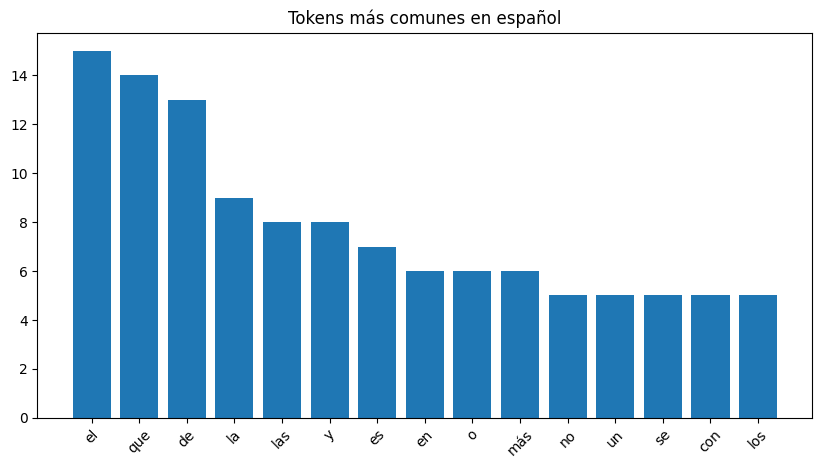

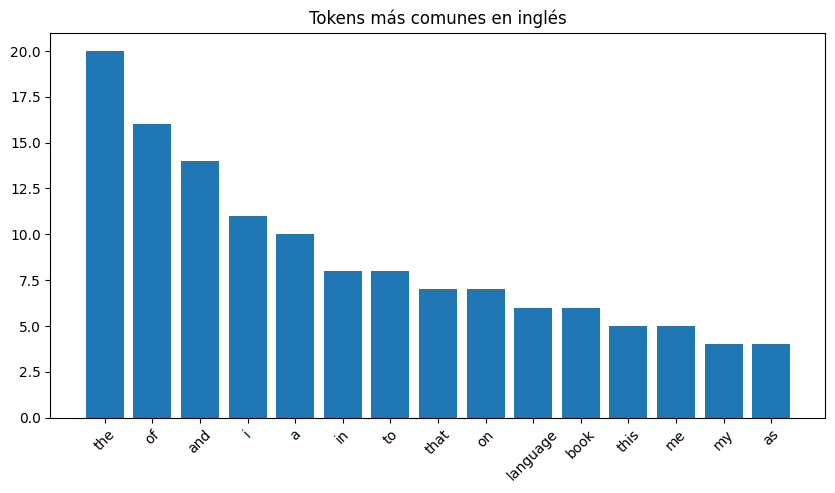

In [25]:
most_common_esp = Counter(tokens_esp).most_common(15)   # De la contabilización de tokens en el documento en español, seleccionamos los más comunes
most_common_eng = Counter(tokens_eng).most_common(15)   # De la contabilización de tokens en el documento en inglés, seleccionamos los más comunes

# Graficar tokens más comunes
def plot_most_common(tokens, title):
    tokens, counts = zip(*tokens)       # Generamos un iterable a partir de los tokens y su conteo
    plt.figure(figsize=(10, 5))         # Inicializamos el gráfico
    plt.bar(tokens, counts)             # Graficamos las barras de tokens y su conteo
    plt.title(title)                    # Imprimimos el título
    plt.xticks(rotation=45)             # Rotamos el texto para que sea legible
    plt.show()                          # Mostramos la gráfica

plot_most_common(most_common_esp, "Tokens más comunes en español")  # Mostramos la gráfica correspondiente al documento en español
plot_most_common(most_common_eng, "Tokens más comunes en inglés")   # Mostramos la gráfica correspondiente al documento en inglés

### Normalización de texto. General el código necesario para remover términos no relevantes (stop words), “lematizar” y hacer “stemming” de cada uno de los textos. Adicionalmente, y con la base en lo observado en el punto anterior, el alumno debe proponer, justificar y ejecutar al menos tres técnicas de normalización adicionales para cada texto. El total de tareas de normalización debe ser de al menos 6.

#### Remover Stop Words

In [26]:
# Definimos la función para eliminar las 'stop-words'
def remover_stop_words(doc):
    return [                                            # Generamos un iterable...
        token.text                                      # con cada token convertido a texto...
        for token in doc                                # proveniente del documento ingresado...
        if not token.is_stop and not token.is_punct]    # si el token no es una 'stop-word' y no es un signo de puntuación

# Eliminamos las palabras del documento
tokens_esp_sin_stop = remover_stop_words(doc_esp)
tokens_eng_sin_stop = remover_stop_words(doc_eng)       

# Imprimimos los resultados
print(f"Tokens sin stop words en español: {tokens_esp_sin_stop[:15]}")
print(f"Tokens sin stop words en inglés: {tokens_eng_sin_stop[:15]}")

Tokens sin stop words en español: ['general', 'pensamos', 'complejidades', 'lenguajes', 'comportamiento', 'intuitivo', 'utiliza', 'transmitir', 'información', 'significados', 'señales', 'semánticas', 'palabras', 'signos', 'imágenes']
Tokens sin stop words en inglés: ['journey', 'language', 'sparked', '1996', 'discovered', 'Keith', 'Basso', 'astonishing', 'book', 'Wisdom', 'Sits', 'Places', 'Writing', 'unique', 'place']


#### Lematización

In [27]:
# Función para la lematización
def lematizar(doc):
    return [                                        # Generamos un iterable...
        token.lemma_                                # con el lema de cada token...
        for token in doc                            # por cada token en el documento...
        if not token.is_punct and not token.is_stop]# si el token no es un signo de puntuación y no es una 'stop-word'

# Aplicamos la lematización a cada documento
tokens_esp_lematizados = lematizar(doc_esp)
tokens_eng_lematizados = lematizar(doc_eng)

# Imprimimos los resultados
print(f"Tokens lematizados en español: {tokens_esp_lematizados[:15]}")
print(f"Tokens lematizados en inglés: {tokens_eng_lematizados[:15]}")

Tokens lematizados en español: ['general', 'pensar', 'complejidad', 'lenguaje', 'comportamiento', 'intuitivo', 'utilizar', 'transmitir', 'información', 'significado', 'señal', 'semántico', 'palabra', 'signo', 'imagen']
Tokens lematizados en inglés: ['journey', 'language', 'spark', '1996', 'discover', 'Keith', 'Basso', 'astonishing', 'book', 'wisdom', 'sit', 'place', 'write', 'unique', 'place']


#### Stemming

In [14]:
# Función rudimentaria para stemming en español
def rudimentary_stemmer(word, idioma="es"):
    if idioma == "es": 
        suffixes = ['ar', 'er', 'ir', 'ando', 'iendo', 'ado', 'ido', 'ción', 'es', 'mente', 's', 'a', 'o']
    elif idioma == "en": 
        suffixes = ['ing', 'ed', 'ly', 's', 'es', 'er', 'est', 'y']
    for suffix in suffixes: 
        if word.endswith(suffix): 
            return word[:-len(suffix)]
    return word

# Probar con un texto en español
tokens_stemmizados_esp = [rudimentary_stemmer(token) for token in tokens_esp]
print(tokens_stemmizados_esp)
tokens_stemmizados_eng = [rudimentary_stemmer(token) for token in tokens_eng]
print(tokens_stemmizados_eng)

['por', 'l', 'general', 'n', 'pensamo', 'en', 'la', 'complejidad', 'de', 'nuestro', 'propio', 'lenguaj', '', 'un', 'comportamient', 'intuitiv', 'que', 'se', 'utiliz', 'par', 'transmit', 'informa', 'y', 'significado', 'con', 'señal', 'semántica', 'com', 'palabra', 'signo', '', 'imágen', 'se', 'dice', 'que', '', 'má', 'fácil', 'aprend', 'un', 'idiom', 'nuev', 'cu', 'somo', 'adolescent', 'porque', 'se', 'trat', 'de', 'un', 'comportamient', 'repetible', 'y', 'entren', 'casi', 'com', 'camin', 'asimism', 'el', 'idiom', 'n', 'sigue', 'un', 'conjunt', 'de', 'regla', 'estrict', 'y', 'que', 'la', 'excepcion', 'son', 'innumerabl', 'por', 'ejempl', 'lo', 'sustantivo', 'que', 'terminan', 'con', '', 'son', 'femenino', 'per', 'n', '', 'el', 'cas', 'del', 'sustantiv', 'el', 'problem', 'sin', 'embarg', '', 'lo', 'humano', 'no', 'result', 'natural', '', 'extremada', 'difícil', 'par', 'la', 'computadora', 'y', 'que', 'tienen', 'que', 'lidi', 'con', 'un', 'gran', 'cantidad', 'de', 'dato', 'n', 'estructura

#### Convertir a minúsculas

In [15]:
# Convertir a minúsculas
def convertir_a_minusculas(tokens):
    return [token.lower() for token in tokens]

tokens_esp_minusculas = convertir_a_minusculas(tokens_esp_lematizados)
tokens_eng_minusculas = convertir_a_minusculas(tokens_eng_lematizados)

print(f"Tokens en minúsculas en español: {tokens_esp_minusculas[:15]}")
print(f"Tokens en minúsculas en inglés: {tokens_eng_minusculas[:15]}")

Tokens en minúsculas en español: ['general', 'pensar', 'complejidad', 'lenguaje', 'comportamiento', 'intuitivo', 'utilizar', 'transmitir', 'información', 'significado', 'señal', 'semántico', 'palabra', 'signo', 'imagen']
Tokens en minúsculas en inglés: ['journey', 'language', 'spark', '1996', 'discover', 'keith', 'basso', 'astonishing', 'book', 'wisdom', 'sit', 'place', 'write', 'unique', 'place']


#### Eliminar caracteres no alfabéticos

In [16]:
def eliminar_no_alfabeticos(tokens):
    return [token for token in tokens if token.isalpha()]

tokens_esp_alfabeticos = eliminar_no_alfabeticos(tokens_esp_minusculas)
tokens_eng_alfabeticos = eliminar_no_alfabeticos(tokens_eng_minusculas)

print(f"Tokens alfabéticos en español: {tokens_esp_alfabeticos[:15]}")
print(f"Tokens alfabéticos en inglés: {tokens_eng_alfabeticos[:15]}")

Tokens alfabéticos en español: ['general', 'pensar', 'complejidad', 'lenguaje', 'comportamiento', 'intuitivo', 'utilizar', 'transmitir', 'información', 'significado', 'señal', 'semántico', 'palabra', 'signo', 'imagen']
Tokens alfabéticos en inglés: ['journey', 'language', 'spark', 'discover', 'keith', 'basso', 'astonishing', 'book', 'wisdom', 'sit', 'place', 'write', 'unique', 'place', 'make']


#### Eliminar palabras cortas

In [17]:
# Eliminar palabras cortas
def eliminar_palabras_cortas(tokens, min_len=3):
    return [token for token in tokens if len(token) >= min_len]

tokens_esp_largas = eliminar_palabras_cortas(tokens_esp_alfabeticos)
tokens_eng_largas = eliminar_palabras_cortas(tokens_eng_alfabeticos)

print(f"Tokens largos en español: {tokens_esp_largas[:15]}")
print(f"Tokens largos en inglés: {tokens_eng_largas[:15]}")

Tokens largos en español: ['general', 'pensar', 'complejidad', 'lenguaje', 'comportamiento', 'intuitivo', 'utilizar', 'transmitir', 'información', 'significado', 'señal', 'semántico', 'palabra', 'signo', 'imagen']
Tokens largos en inglés: ['journey', 'language', 'spark', 'discover', 'keith', 'basso', 'astonishing', 'book', 'wisdom', 'sit', 'place', 'write', 'unique', 'place', 'make']


#### Textos normalizados

In [18]:
# Combinar todas las técnicas en un flujo de normalización
def normalizar_texto(doc, idioma="es"):
    # Remover stop words
    tokens_sin_stop = remover_stop_words(doc)
    
    # Lematización
    tokens_lematizados = lematizar(doc)
    
    # Stemming rudimentario
    tokens_stemmizados = [rudimentary_stemmer(token, idioma) for token in tokens_lematizados]
    
    # Convertir a minúsculas
    tokens_minusculas = convertir_a_minusculas(tokens_stemmizados)
    
    # Eliminar caracteres no alfabéticos
    tokens_alfabeticos = eliminar_no_alfabeticos(tokens_minusculas)
    
    # Eliminar palabras cortas
    tokens_normalizados = eliminar_palabras_cortas(tokens_alfabeticos)    
    return tokens_normalizados

# Aplicar normalización
tokens_esp_normalizados = normalizar_texto(doc_esp, "es")
tokens_eng_normalizados = normalizar_texto(doc_eng, "en")

print(f"Texto normalizado en español: {tokens_esp_normalizados[:15]}")
print(f"Texto normalizado en inglés: {tokens_eng_normalizados[:15]}")

Texto normalizado en español: ['general', 'pens', 'complejidad', 'lenguaje', 'comportamient', 'intuitiv', 'utiliz', 'transmit', 'informa', 'signific', 'señal', 'semántic', 'palabr', 'sign', 'imagen']
Texto normalizado en inglés: ['journe', 'language', 'spark', 'discov', 'keith', 'basso', 'astonish', 'book', 'wisdom', 'sit', 'place', 'write', 'unique', 'place', 'make']


In [19]:
# Función de normalización con stemming rudimentario
def normalizar_texto(doc, idioma="es"):
    # Remover stop words
    tokens_sin_stop = remover_stop_words(doc)
    
    # Lematización aplicada a los tokens sin stop words
    tokens_lematizados = [token.lemma_ for token in doc if token.text in tokens_sin_stop]
    
    # Stemming rudimentario
    tokens_stemmizados = [rudimentary_stemmer(token, idioma) for token in tokens_lematizados]
    
    # Convertir a minúsculas
    tokens_minusculas = convertir_a_minusculas(tokens_stemmizados)
    
    # Eliminar caracteres no alfabéticos
    tokens_alfabeticos = eliminar_no_alfabeticos(tokens_minusculas)
    
    # Eliminar palabras cortas
    tokens_normalizados = eliminar_palabras_cortas(tokens_alfabeticos)    
    
    return tokens_normalizados


# Aplicar la normalización con stemming rudimentario
tokens_esp_normalizados = normalizar_texto(doc_esp, "es")
tokens_eng_normalizados = normalizar_texto(doc_eng, "en")

print(f"Texto normalizado con stemming en español: {tokens_esp_normalizados[:15]}")
print(f"Texto normalizado con stemming en inglés: {tokens_eng_normalizados[:15]}")

Texto normalizado con stemming en español: ['general', 'pens', 'complejidad', 'lenguaje', 'comportamient', 'intuitiv', 'utiliz', 'transmit', 'informa', 'signific', 'señal', 'semántic', 'palabr', 'sign', 'imagen']
Texto normalizado con stemming en inglés: ['journe', 'language', 'spark', 'discov', 'keith', 'basso', 'astonish', 'book', 'wisdom', 'sit', 'place', 'write', 'unique', 'place', 'make']


In [20]:
def normalizar_iterativamente(doc, idioma="es", iteraciones=1):
    tokens_normalizados = normalizar_texto(doc, idioma)
    for _ in range(iteraciones - 1):  # -1 porque ya hicimos 1 iteración
        # Convertir la lista de tokens en un nuevo doc para la siguiente normalización
        nuevo_doc = nlp_esp(" ".join(tokens_normalizados)) if idioma == "es" else nlp_eng(" ".join(tokens_normalizados))
        tokens_normalizados = normalizar_texto(nuevo_doc, idioma)
    return tokens_normalizados

tokens_esp_normalizados_iter = normalizar_iterativamente(doc_esp, "es", iteraciones=3)
tokens_eng_normalizados_iter = normalizar_iterativamente(doc_eng, "en", iteraciones=3)

print(f"Texto normalizado iterativamente en español: {tokens_esp_normalizados_iter[:15]}")
print(f"Texto normalizado iterativamente en inglés: {tokens_eng_normalizados_iter[:15]}")

Texto normalizado iterativamente en español: ['general', 'complejidad', 'lenguaje', 'comportamient', 'intuitiv', 'utiliz', 'transmit', 'inform', 'signific', 'señal', 'semántic', 'palabr', 'sign', 'imagen', 'fácil']
Texto normalizado iterativamente en inglés: ['journe', 'language', 'spark', 'discov', 'keith', 'basso', 'astonish', 'book', 'wisdom', 'sit', 'place', 'write', 'unique', 'place', 'language']
